In [1]:
# 텐서플로우 프레임워크
import tensorflow as tf

# 케라스(딥러닝 모델) 라이브러리
from tensorflow import keras

# 시각화 라이브러리
import matplotlib.pyplot as plt

# 넘파이
import numpy as np

# 데이터 분류 라이브러리
from sklearn.model_selection import train_test_split

import pandas as pd

# 딥러닝 랜덤규칙 정의(모든 사람이 정확하게 일치하지는 않음)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
df = pd.read_csv("./data/01_회귀_주택가격예측_데이터셋_Row_1000.csv")

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   면적          1000 non-null   float64
 1   층수          1000 non-null   int64  
 2   역까지_도보시간    1000 non-null   float64
 3   주변_편의시설_점수  1000 non-null   float64
 4   주택_가격       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.258806,15.300000,28.935722,5.663576,18486.887415
std,49.173936,8.695379,17.148260,2.583594,10427.177312
min,36.276450,1.000000,1.034263,1.011372,1312.073187
25%,75.918038,8.000000,14.529759,3.446698,9587.864073
50%,118.338542,15.000000,27.478162,5.717975,16434.524871
75%,159.802495,23.000000,42.964969,7.935390,26276.908661
max,203.987011,30.000000,59.983704,9.994926,44167.392672


In [4]:
X = df.iloc[:,:4]
y = df["주택_가격"]
X.shape, y.shape

((1000, 4), (1000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
model = keras.Sequential()

In [8]:
model.add(
    keras.layers.Dense(
        units=64,
        activation="relu",
        input_shape=(4, )
    )
)
model.add(
    keras.layers.Dense(
        units=32,
        activation="relu"
    )
)
model.add(
    keras.layers.Dense(
        units=1,
        activation="linear"
    )
)

In [9]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [10]:
# 콜백 함수(ModelCheckpoint) 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "./model/best_cnn_model.h5",
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=2,
    restore_best_weights=True
)
history = model.fit(X_train_scaled, y_train, epochs=1000,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
25/25 [==============================] - 1s 13ms/step - loss: 455116064.0000 - mae: 18662.4004 - val_loss: 431334528.0000 - val_mae: 17781.6699
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 455063680.0000 - mae: 18661.0371 - val_loss: 431275456.0000 - val_mae: 17780.0957
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 454981088.0000 - mae: 18658.9980 - val_loss: 431172928.0000 - val_mae: 17777.5078
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 454839488.0000 - mae: 18655.5938 - val_loss: 430993792.0000 - val_mae: 17773.2090
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 454597792.0000 - mae: 18650.0430 - val_loss: 430705632.0000 - val_mae: 17766.4707
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 454217248.0000 - mae: 18641.5195 - val_loss: 430261120.0000 - val_mae: 17756.4082
Epoch 7/1000
25/25 [==============================] - 0s 4ms/st

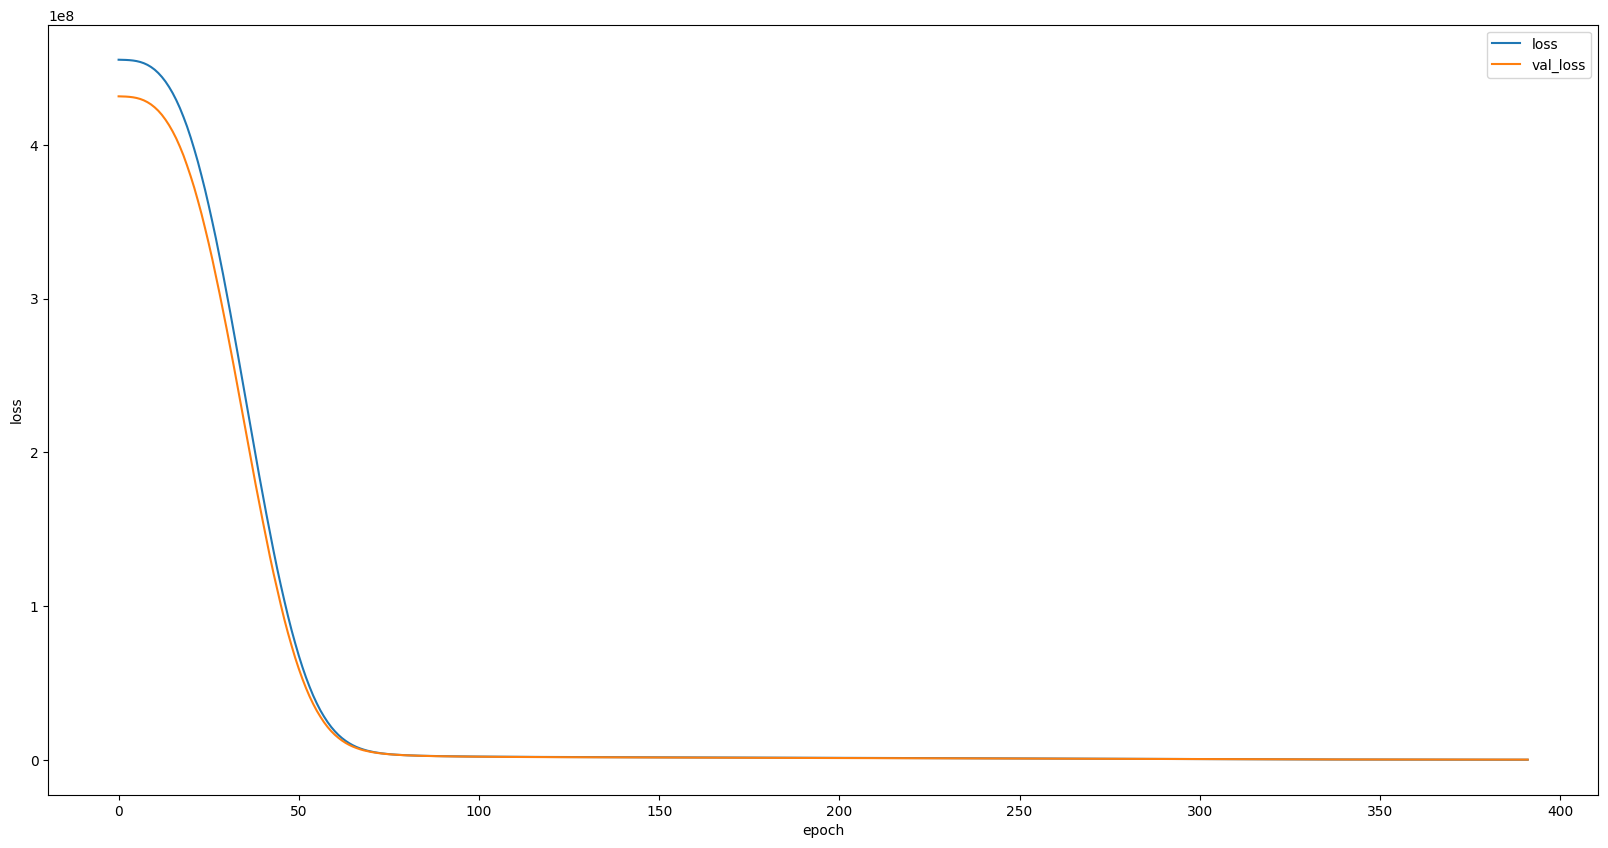

In [11]:
plt.figure(figsize=(20,10))
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid
plt.legend(["loss", "val_loss"])
plt.show()

In [12]:
best_model = keras.models.load_model("./model/best_cnn_model.h5")

In [13]:
test_pred = best_model.predict(X_test_scaled)

In [14]:
test_pred[0], y_test.iloc[0]

(array([37310.34], dtype=float32), 37736.35224458798)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [16]:
mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)
mae, mse, r2

(576.0339188405836, 503951.7105554971, 0.9956233694003138)

In [ ]:
# r2_score > 0.995  이고 mae < 600 이하 이므로 실제값과 예측값의 차이가 매우 작은 것으로 보인다
# 그러므로 DNN을 이용한 회귀모델은 휼울한 것으로 보인다.